This notebook explores Myers-Brigs Personality type dataset.  

The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:
* Introversion (I) – Extroversion (E)
* Intuition (N) – Sensing (S)
* Thinking (T) – Feeling (F)
* Judging (J) – Perceiving (P)

In the dataset, there are 8600 rows of data. Each row contains a person's MBTI personality class and the last 50 things that he/she posted in PersonalityCafe Forum. 

In [1]:
# Import libraries 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread

In [2]:
# define paths, constants etc. 
datadir = "../dataset/mbti-type/"
datafile = "../dataset/mbti-type/mbti_1.csv"
preprocessed_data = "../dataset/preprocessed_data_colab.json"
HTTP = ["http://", "https://", ".com", "www."]
IMAGE = [".jpg",".png", ".gif"]
EMOJI = [":D",":)",":(","D:",":o"]

In [8]:
import json
def read_dataset(filepath):
    with open(filepath) as fp:
        return json.load(fp)

# Open dataset

First, let's read csv files and see the first 10 examples

In [9]:
# Opening dataset as pandas dataframe 
df = pd.read_csv(datafile)
print("There are %d number of data "  %len(df))
# Looking the first 5 elements 
df.head(5)

There are 8675 number of data 


type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

In [11]:
# How many different type in the dataset?
print("There are %d number of different classes " %len(df.type.unique())) 
print("The classes are : ")
print(df.type.unique())

There are 16 number of different classes 
The classes are : 
['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


In [14]:
# # Frequency of classes over population
#d = {'type': ['ESTJ','ESFJ','ESFP','ESTP','ISFJ', 'ENFJ', 'ISTJ', 
#             'ENTJ','ISFP', 'ENFP', 'ENTP', 'INTJ', 'INFJ','INFP'], 
#     'ratio': [8.7, 12.3, 8.5, 4.3, 13.8, 2.5, 11.6,1.8, 8.8, 8.1, 3.2, 2.1, 1.5,4.4] }


#df_population = pd.DataFrame(data=d)
#df_population['numbers'] = df_population['ratio']*86.75


 How many example in each classes? 

Text(0, 0.5, 'Number of Example')

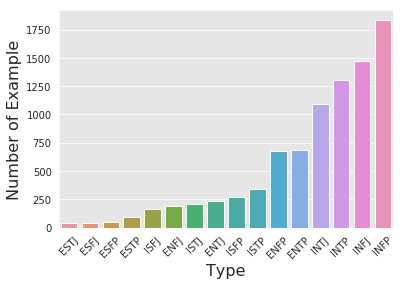

In [15]:
df_sorted = df.groupby(['type'], sort=True).count().sort_values(['posts'])
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.barplot(x=df_sorted.index, y="posts", data=df_sorted)
plt.xticks(rotation=45)
plt.xlabel("Type", fontsize = 16 )
plt.ylabel("Number of Example", fontsize =16)

Number of posts, separated by |||, by each class

Text(0, 0.5, 'Number of Posts')

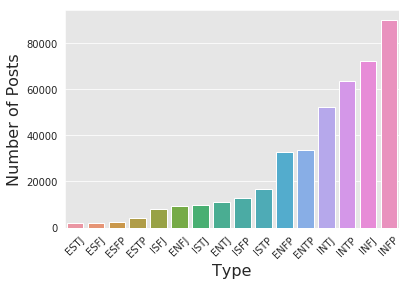

In [25]:
posts = df['posts'].apply(lambda x: x.split("|||"))
df['nbr_post'] = [len(p) for p in posts]

df_sorted = df.groupby(['type'], sort=True).sum().sort_values(['nbr_post'])
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.barplot(x=df_sorted.index, y="nbr_post", data=df_sorted)
plt.xticks(rotation=45)
plt.xlabel("Type", fontsize = 16 )
plt.ylabel("Number of Posts", fontsize =16)

In [26]:
# copy the dataframe to save the original 
df_copy = df.copy()
df_copy.head()

type                                              posts  nbr_post
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...        50
1  ENTP  'I'm finding the lack of me in these posts ver...        50
2  INTP  'Good one  _____   https://www.youtube.com/wat...        50
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...        50
4  ENTJ  'You're fired.|||That's another silly misconce...        50

In [27]:
# split the comments by |||
df_copy['posts'] = df_copy['posts'].apply(lambda x: x.split("|||"))
print("Dataframe shape : " , df_copy.shape) 

Dataframe shape :  (8675, 3)


In [28]:
df_copy.head()

type                                              posts  nbr_post
0  INFJ  ['http://www.youtube.com/watch?v=qsXHcwe3krw, ...        50
1  ENTP  ['I'm finding the lack of me in these posts ve...        50
2  INTP  ['Good one  _____   https://www.youtube.com/wa...        50
3  INTJ  ['Dear INTP,   I enjoyed our conversation the ...        50
4  ENTJ  ['You're fired., That's another silly misconce...        50

What is the usage of punctuations, emoticons, links etc. by different classes? 

We'll generate new columns using the numbers of links, images, punctuations, then plot them.


In [29]:
nbr_word = []
for i in range(len(df_copy)):
    nbr_word.append(sum([len(p.split()) for p in df_copy.posts[i]])/50)
df_copy['avg_word_per_comment'] = nbr_word    
    
feature_dict = {'avg_nbr_http':[],'avg_nbr_image':[],'avg_nbr_question':[],
                'avg_exclamation':[], 'avg_emoji':[], 'avg_points':[]}
val_dict = {'avg_nbr_http':HTTP,'avg_nbr_image':IMAGE,'avg_nbr_question':"?",
                'avg_exclamation':"!", 'avg_emoji':EMOJI, 'avg_points':"..."}

for k,v in val_dict.items():
    print(k)
    for i in range(len(df_copy)):
        if isinstance(v,list):
            feature_dict[k].append(len([p for p in df_copy.posts[i] if any(f in p for f in v)])/50)
        else:
            feature_dict[k].append(sum([f.count(v) for f in df_copy.posts[i]])/50)
    print("Number of rows: " , len(feature_dict[k]))
    df_copy[k] = feature_dict[k]


avg_nbr_http
Number of rows:  8675
avg_nbr_image
Number of rows:  8675
avg_nbr_question
Number of rows:  8675
avg_exclamation
Number of rows:  8675
avg_emoji
Number of rows:  8675
avg_points
Number of rows:  8675


In [30]:
df_copy.drop(["posts"],axis=1, inplace=True)
print("Finally, we have a dataframe of shape ", df_copy.shape)
df_copy.head()

Finally, we have a dataframe of shape  (8675, 9)


type  nbr_post  avg_word_per_comment  avg_nbr_http  avg_nbr_image  \
0  INFJ        50                 12.10          0.42           0.12   
1  ENTP        50                 24.38          0.16           0.10   
2  INTP        50                 17.70          0.10           0.00   
3  INTJ        50                 22.26          0.04           0.00   
4  ENTJ        50                 20.32          0.12           0.04   

   avg_nbr_question  avg_exclamation  avg_emoji  avg_points  
0              0.36             0.06       0.00        0.30  
1              0.10             0.00       0.26        0.38  
2              0.24             0.08       0.18        0.26  
3              0.22             0.06       0.00        0.52  
4              0.20             0.02       0.00        0.42

# Plot dataframe by class 

In [31]:
# Group the rows by the classes 
# We have 16 rows of data 
df_copy_class = df_copy.groupby(['type'], sort=True).mean().sort_values(['type'])
# add index column
df_copy_class['type'] = df_copy_class.index
df_copy_class.reset_index(drop=True)
print("Dataset shape ", df_copy_class.shape)

Dataset shape  (16, 9)


In [32]:
df_copy_class.head()

nbr_post  avg_word_per_comment  avg_nbr_http  avg_nbr_image  \
type                                                                 
ENFJ  48.884211             26.688421      0.050526       0.016000   
ENFP  48.546667             26.160326      0.045452       0.014193   
ENTJ  48.800866             25.312641      0.047965       0.019481   
ENTP  49.286131             25.077197      0.044584       0.017255   
ESFJ  48.047619             26.750476      0.023333       0.007619   

      avg_nbr_question  avg_exclamation  avg_emoji  avg_points  type  
type                                                                  
ENFJ          0.213053         0.276000   0.066000    0.744421  ENFJ  
ENFP          0.227259         0.338785   0.069867    0.715881  ENFP  
ENTJ          0.240000         0.165974   0.025974    0.646667  ENTJ  
ENTP          0.220964         0.142599   0.026423    0.631036  ENTP  
ESFJ          0.176190         0.230476   0.054762    0.638571  ESFJ

Text(0, 0.5, 'Average Words per Post')

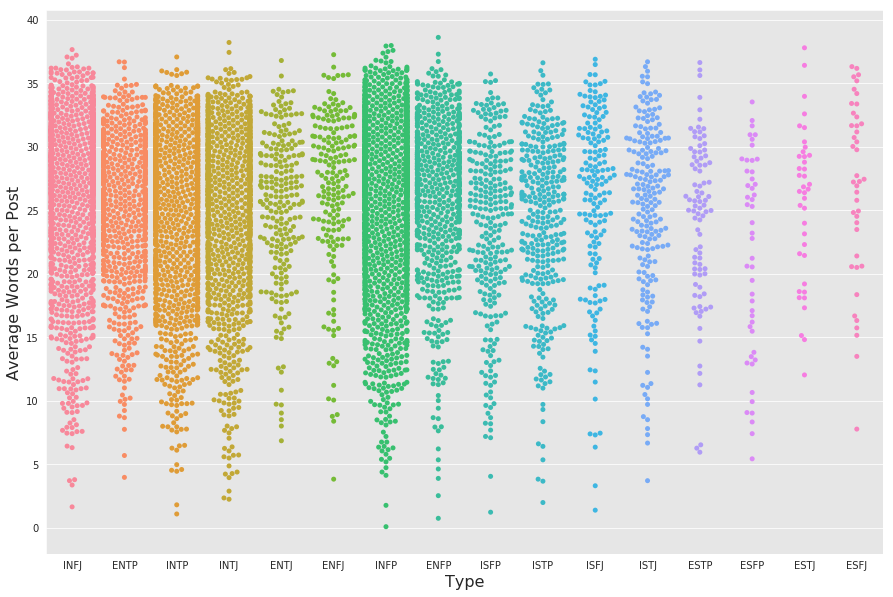

In [34]:
# The average word per comment by classes 
plt.figure(figsize=(15,10))

sns.swarmplot("type", "avg_word_per_comment", data=df_copy)
plt.xlabel("Type", fontsize = 16 )
plt.ylabel("Average Words per Post", fontsize =16)

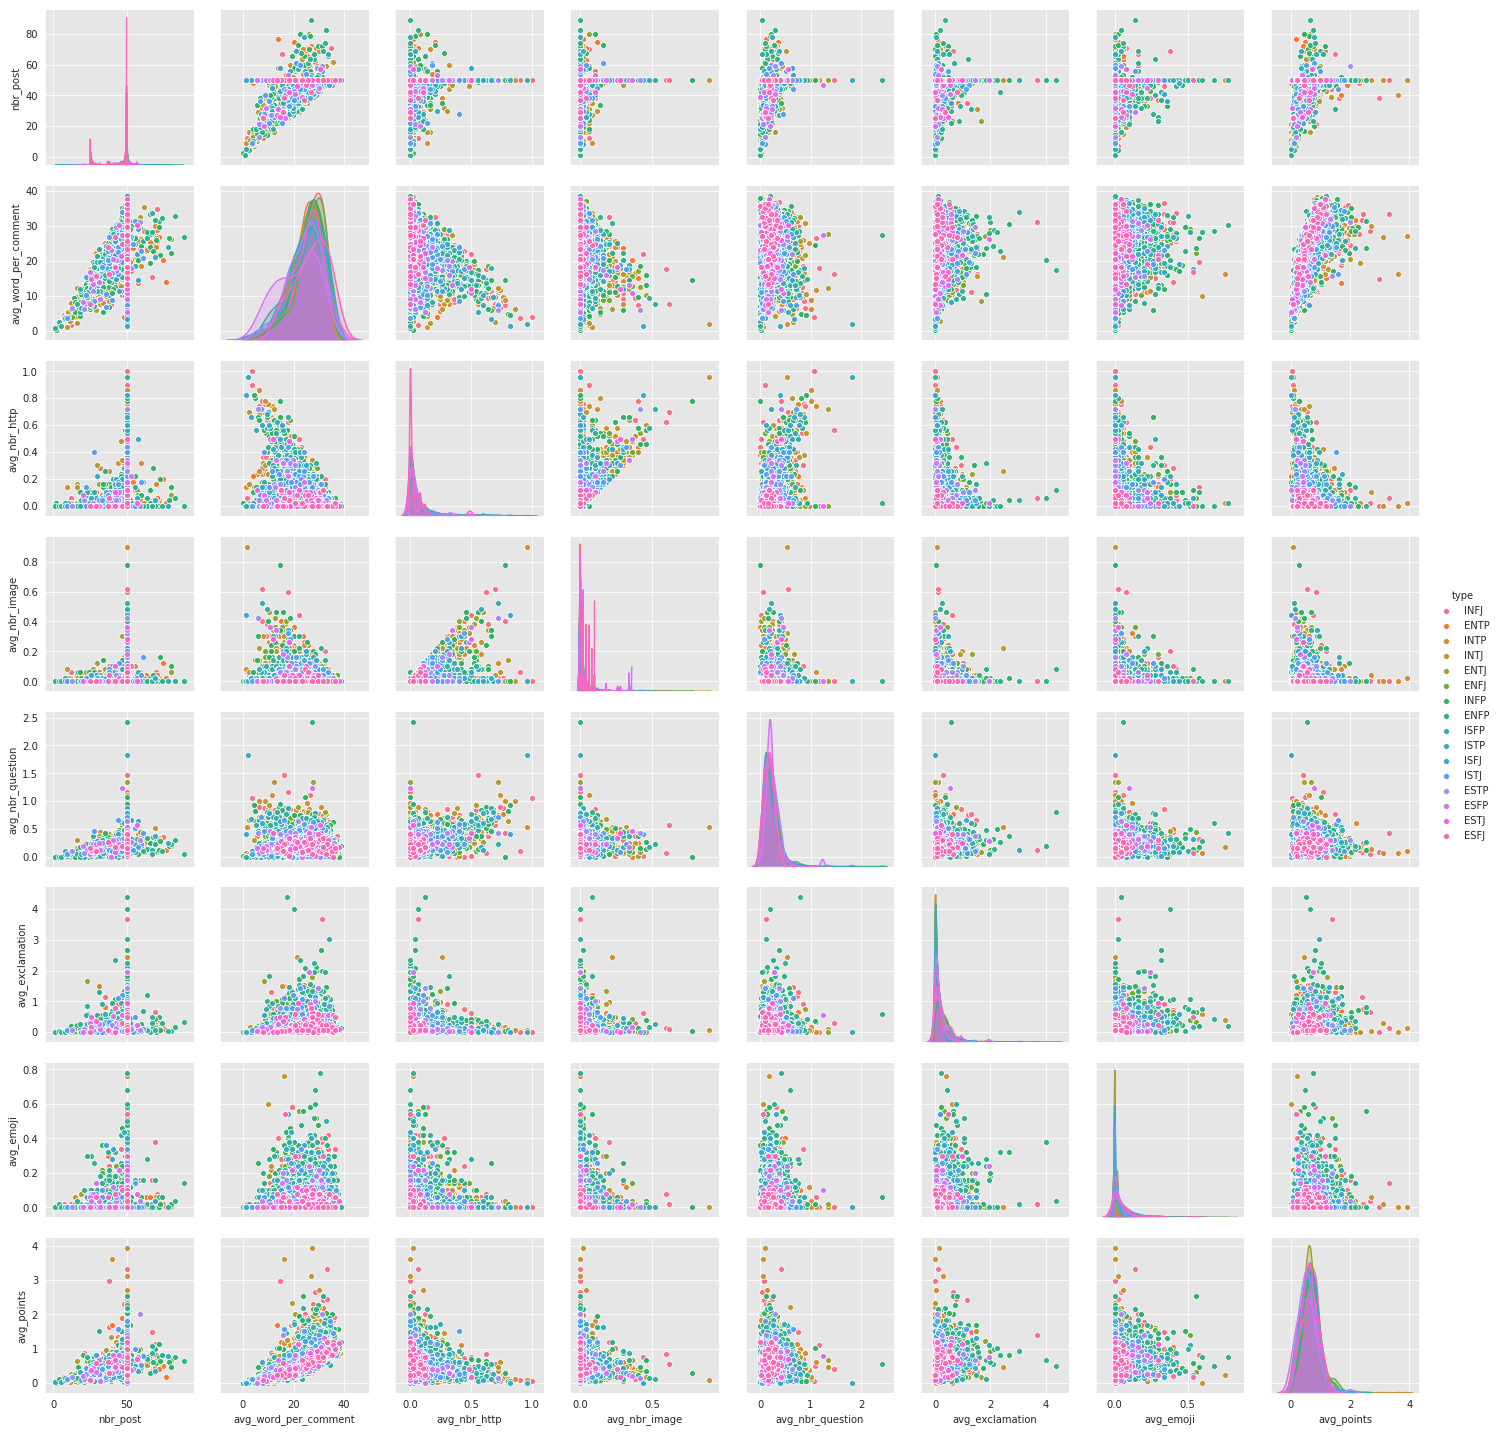

In [26]:
g = sns.pairplot(df_copy, hue="type")

/home/matmazel/miniconda3/envs/py3Torch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


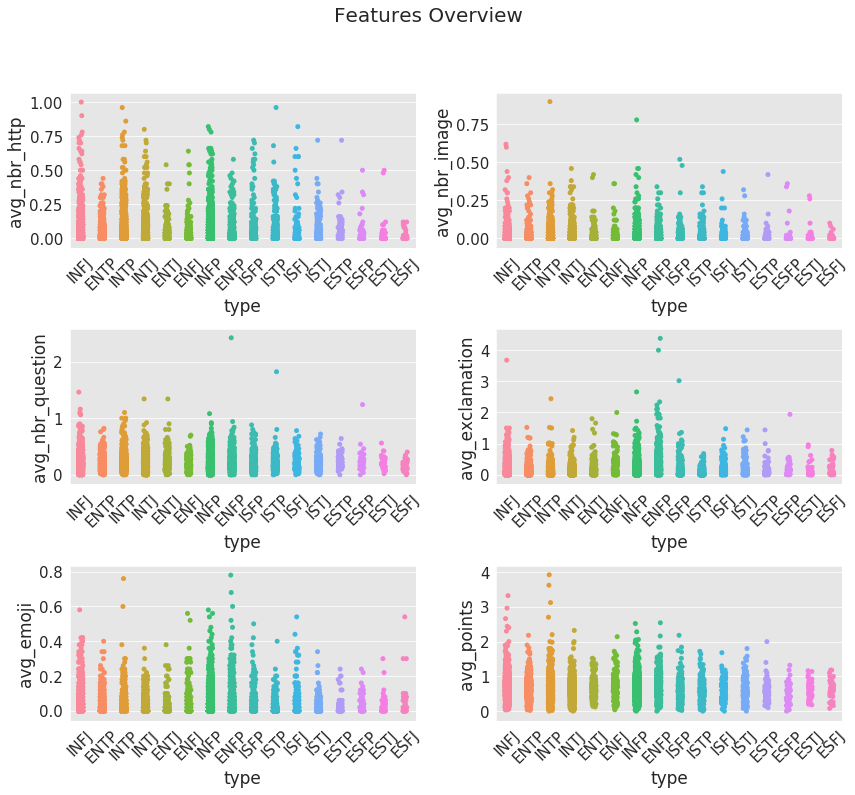

In [40]:
fig, ax = plt.subplots(3,2, figsize=(12,10))
cols = list(feature_dict.keys())
labels = ["Avg Nbr HTTP", 
          "Avg Nbr Image", 
          "Avg Nbr Question", 
          "Avg Nbr Exclamation",
          "Avg Nbr Emoji",
           "Avg Nbr Point"]
ind = 0 
for j in range(3):
    for i in range(2):
        plt.xticks(rotation=45)     
        ax[j][i].tick_params(labelsize=15,rotation=45, axis='x')
        ax[j][i].tick_params(labelsize=15, axis='y')

        ax[j][i].set_xlabel('label', fontsize=17, position=(.5,20))
        ax[j][i].set_ylabel(labels[i+j], fontsize=17)
        ax[j][i] = sns.stripplot(x="type", y=cols[ind], data=df_copy, ax=ax[j][i])
        ind += 1 
fig.suptitle('Features Overview', position=(.5,1.1), fontsize=20)
fig.tight_layout()

fig.show()

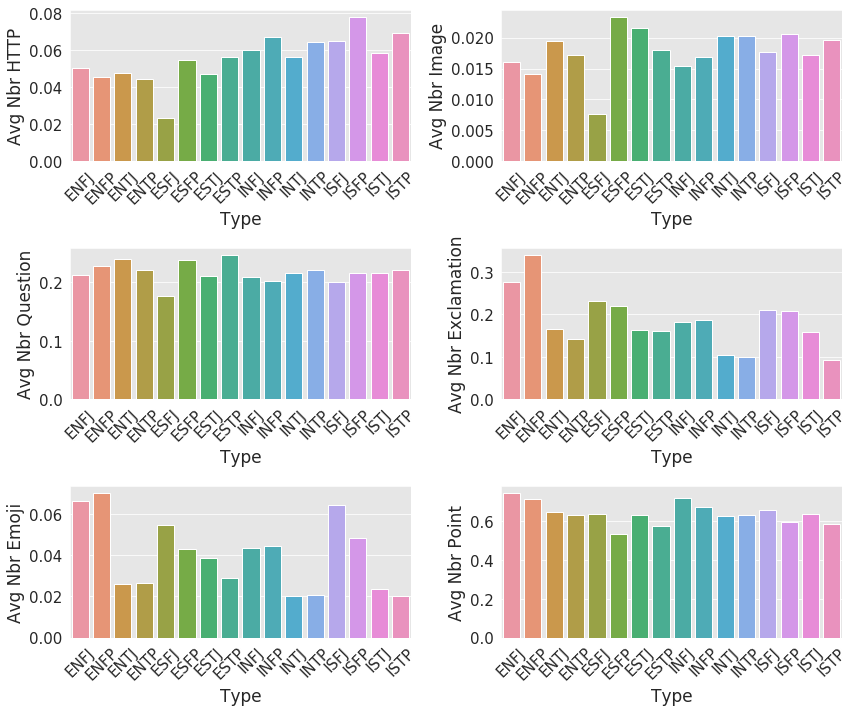

In [41]:
fig, ax = plt.subplots(3,2, figsize=(12,10))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

cols = list(feature_dict.keys())
labels = ["Avg Nbr HTTP", 
          "Avg Nbr Image", 
          "Avg Nbr Question", 
          "Avg Nbr Exclamation",
          "Avg Nbr Emoji",
           "Avg Nbr Point"]

ind = 0 
for j in range(3):
    for i in range(2):
        plt.xticks(rotation=45)     
        ax[j][i].tick_params(labelsize=15,rotation=45, axis='x')
        ax[j][i].tick_params(labelsize=15, axis='y')

        ax[j][i].set_xlabel('Type', fontsize=17, position=(.5,20))
        ax[j][i].set_ylabel(labels[ind], fontsize=17)
        ax[j][i] = sns.barplot(x="type", y=cols[ind], data=df_copy_class, ax=ax[j][i])
        ax[j][i].set(xlabel='Type', ylabel=labels[ind]) 
        ind += 1 
        
#fig.suptitle('Overview', position=(.5,1.1), fontsize=20)
fig.tight_layout()


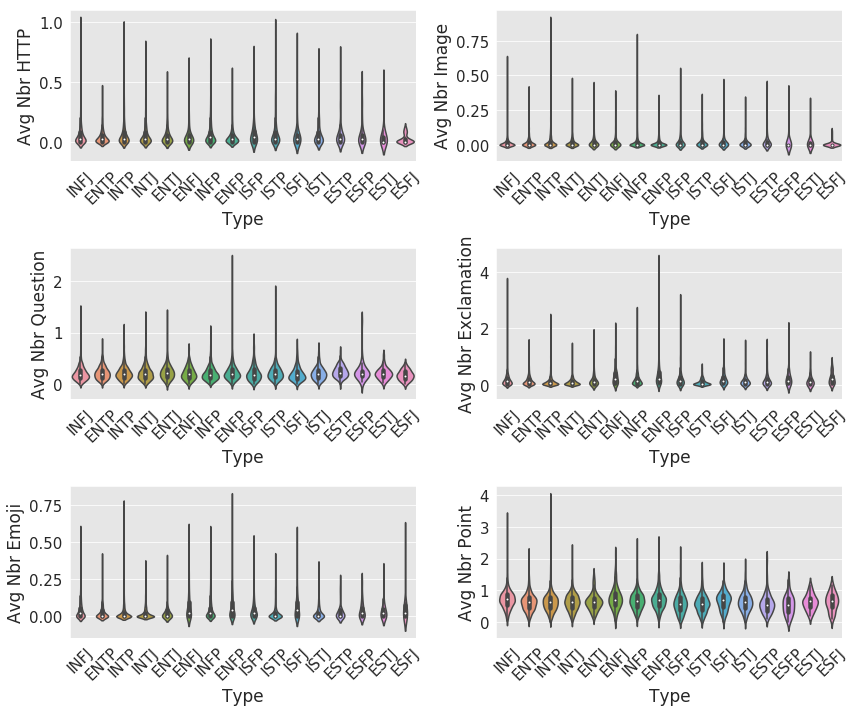

In [31]:
fig, ax = plt.subplots(3,2, figsize=(12,10))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

cols = list(feature_dict.keys())
labels = ["Avg Nbr HTTP", 
          "Avg Nbr Image", 
          "Avg Nbr Question", 
          "Avg Nbr Exclamation",
          "Avg Nbr Emoji",
           "Avg Nbr Point"]

ind = 0 
for j in range(3):
    for i in range(2):
        #plt.xticks(rotation=45)     
        ax[j][i].tick_params(labelsize=15,rotation=45, axis='x')
        ax[j][i].tick_params(labelsize=15, axis='y')

        ax[j][i].set_xlabel('Type', fontsize=17, position=(.5,20))
        ax[j][i].set_ylabel(labels[ind], fontsize=17)
        ax[j][i] = sns.violinplot(x="type", y=cols[ind], data=df_copy, ax=ax[j][i])
        ax[j][i].set(xlabel='Type', ylabel=labels[ind])
        ind += 1 
    if ind ==5:
        break
        
#fig.suptitle('Categorical Features Overview', position=(.5,1.1), fontsize=20)
fig.tight_layout()


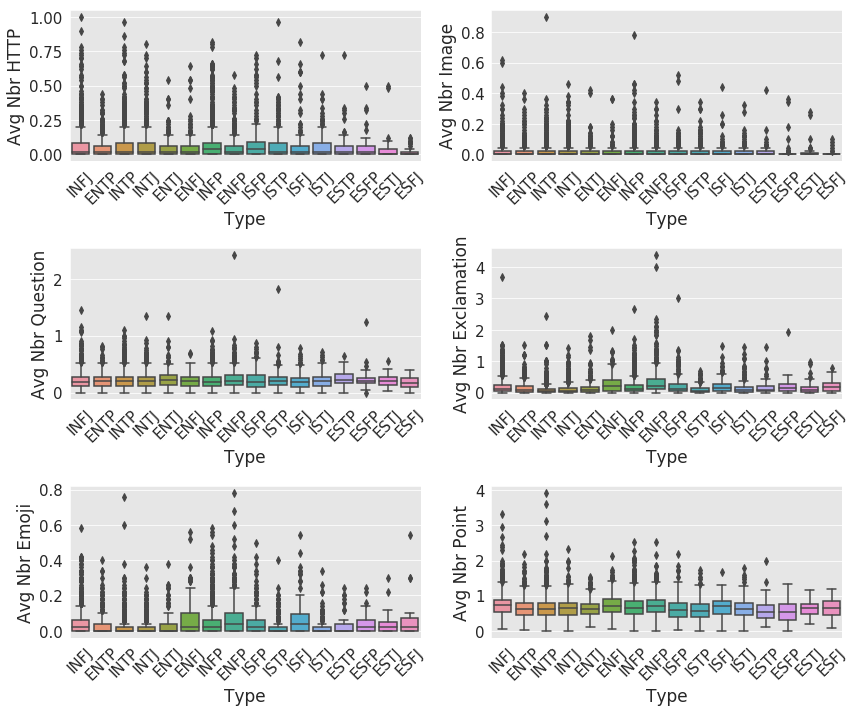

In [32]:
fig, ax = plt.subplots(3,2, figsize=(12,10))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

cols = list(feature_dict.keys())
labels = ["Avg Nbr HTTP", 
          "Avg Nbr Image", 
          "Avg Nbr Question", 
          "Avg Nbr Exclamation",
          "Avg Nbr Emoji",
           "Avg Nbr Point"]

ind = 0 
for j in range(3):
    for i in range(2):
        #plt.xticks(rotation=45)     
        ax[j][i].tick_params(labelsize=15,rotation=45, axis='x')
        ax[j][i].tick_params(labelsize=15, axis='y')

        ax[j][i].set_xlabel('Type', fontsize=17, position=(.5,20))
        ax[j][i].set_ylabel(labels[ind], fontsize=17)
        ax[j][i] = sns.boxplot(x="type", y=cols[ind], data=df_copy, ax=ax[j][i])
        ax[j][i].set(xlabel='Type', ylabel=labels[ind])
        ind += 1 
    if ind ==5:
        break
        
#fig.suptitle('Categorical Features Overview', position=(.5,1.1), fontsize=20)
fig.tight_layout()


# Look the Posts 


In [42]:
# what is the max length of posts ? 
posts = df['posts'].apply(lambda x: x.split("|||"))
nbr_not_50 = 0
flatten_posts = []
for i,ps in enumerate(posts):
    if len(ps)!= 50:
        nbr_not_50 += 1
    for p in ps:
        if len(p)!=0:
            flatten_posts.append(p)
print("There are %d number users that don't have 50 posts" %(nbr_not_50))
print("Overall number is %f " %(nbr_not_50/(1.0*len(posts))))
print("Overall Number of posts %d " %(len(flatten_posts)))


There are 1088 number users that don't have 50 posts
Overall number is 0.125418 
Overall Number of posts 421757 


In [43]:
max_len = len(flatten_posts[0]) 
min_len = len(flatten_posts[0])
for p in flatten_posts:
    if max_len < len(p):
        max_len = len(p)
    if min_len > len(p):
        min_len = len(p)
print("Maximum sentence length %d " %(max_len))
print("Minimum sentence length %d " %(min_len))


Maximum sentence length 263 
Minimum sentence length 1 


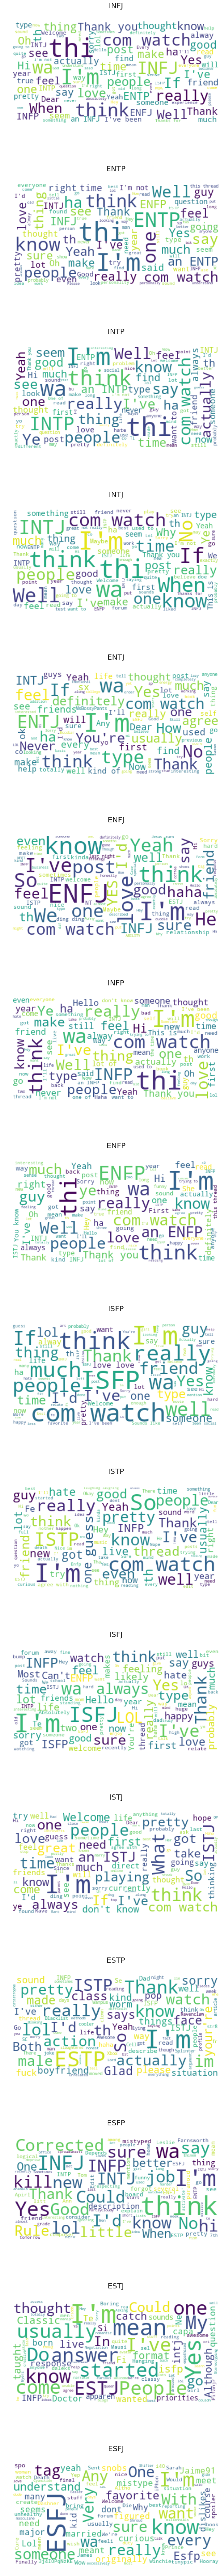

In [67]:
# Generate Word Clouds
types = df['type'].unique()
fig, ax = plt.subplots(len(types), figsize=(10,8*len(types)))
stopwords = set(STOPWORDS)
stopwords.update(["youtube","http","https","com","jpg","png"])

for i in range(len(types)):
    df_sub = df[df['type'] == types[i]]
    wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      stopwords=stopwords,
                      background_color="white").generate(df_sub['posts'].to_string())
    ax[i].imshow(wordcloud,  interpolation='bilinear' )
    ax[i].set_title(types[i],position=(.5,1.1), fontsize=20)
    ax[i].axis("off")
    plt.savefig("../../report/images/wordclouds.png", format="png")

    

